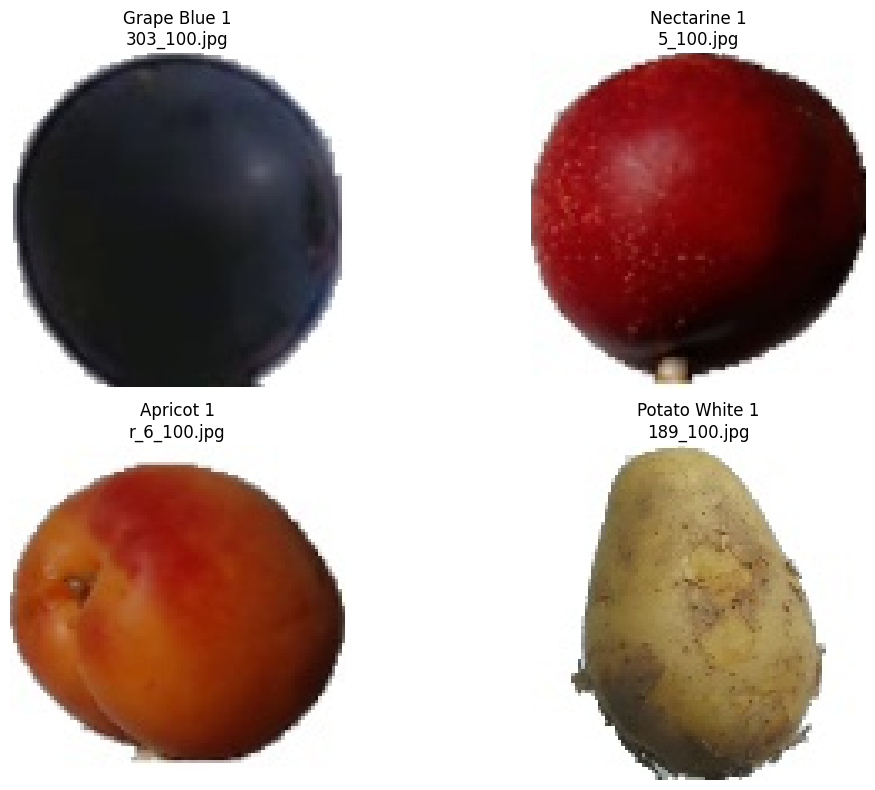

In [4]:
# 📦 Import libraries
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 📁 Step 2: Define Paths
TEST_DIR = "C:/Users/nandi/OneDrive/Desktop/CV-Fruit-Classification-Project/Test"  # Update this path to your local test folder

# 🍓 Select random fruit classes
fruit_classes = [f for f in os.listdir(TEST_DIR) if os.path.isdir(os.path.join(TEST_DIR, f))]
selected_classes = random.sample(fruit_classes, 4)  # Display 4 random classes

# 🎨 Plot random images from each class
plt.figure(figsize=(12, 8))

for i, fruit_class in enumerate(selected_classes):
    class_path = os.path.join(TEST_DIR, fruit_class)
    image_files = [f for f in os.listdir(class_path) if f.endswith(".jpg")]
    selected_image = random.choice(image_files)
    image_path = os.path.join(class_path, selected_image)

    img = Image.open(image_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(f"{fruit_class}\n{selected_image}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
%pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 17.2 MB/s  0:00:00
   ---------------------------------------- 0.0/241.4 MB ? eta -:--:--
   -- ------------------------------------- 14.7/241.4 MB 77.1 MB/s eta 0:00:03
   ----- ---------------------------------- 30.7/241.4 MB 78.0 MB/s eta 0:00:03
   ------- -------------------------------- 45.1/241.4 MB 75.5 MB/s eta 0:00:03
   --------- ------------------------------ 57.1/241.4 MB 75.8 MB/s eta 0:00:03
   ----------- ---------------------------- 71.0/241.4 MB 69.7 MB/s eta 0:00:03
   ------------- -------------------------- 82.6/241.4 MB 68.4 MB/s eta 0:00:03
   ---------------- ----------------------- 97.0/241.4 MB 68.0 MB/s eta 0:00:03
   ------------------ -------------------- 113.0/241.4 MB 69.4 MB/s eta 0:00:02
   -------------------- ------------------ 128.5/241.4 MB 70.1 MB/s eta 0:00:02
   ----------------------- --------------- 142.9/241.4 MB 69.7 MB/

In [10]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 🔧 Preprocessing
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# 📁 Load datasets
train_dataset = datasets.ImageFolder(root="C:/Users/nandi/OneDrive/Desktop/CV-Fruit-Classification-Project/Training", transform=transform)
test_dataset = datasets.ImageFolder(root="C:/Users/nandi/OneDrive/Desktop/CV-Fruit-Classification-Project/Test", transform=transform)

# 🚚 DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 🏷️ Class labels
class_names = train_dataset.classes

In [11]:
import torch.nn as nn

class FruitClassifier(nn.Module):
    def __init__(self, num_classes):
        super(FruitClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 25 * 25, 512), nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.model(x)

In [12]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FruitClassifier(num_classes=len(class_names)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")

Epoch 1, Loss: 598.7863
Epoch 2, Loss: 55.9765
Epoch 3, Loss: 38.8811
Epoch 4, Loss: 10.4738
Epoch 5, Loss: 31.4478
Epoch 6, Loss: 33.7624
Epoch 7, Loss: 4.1289
Epoch 8, Loss: 0.0254
Epoch 9, Loss: 0.0038
Epoch 10, Loss: 0.0015


In [14]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=class_names))

                           precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 11       1.00      1.00      1.00       142
                 Apple 12       1.00      1.00      1.00       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       1.00      1.00      1.00       154
                 Apple 17       1.00      1.00      1.00       201
                 Apple 18       1.00      1.00      1.00       160
                 Apple 19       1.00      1.00      1.00       241
                  Apple 5       1.00      1.00      1.00       146
                  Apple 6       0.71      1.00      0.83       157
                  Apple 7       1.00      1.00      1.00       229
                  Apple 8       1.00      1.00      1.00       228
                  Apple 9       1.00      1.00      1.00       231
         Apple Braeburn 1       0.94      0.77      0.85     

In [16]:

torch.save(model.state_dict(), "fruit_model.pth")